In [1]:
#group of items that are frequently bought together
#https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/

In [2]:
import numpy as np 
import pandas as pd

In [3]:
Customer = pd.read_csv('Customer.csv')
OrderItem = pd.read_csv('OrderItem.csv')
Article = pd.read_csv('ArticleList.csv')

C:\Users\Marci\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Customer.head()

,﻿Country,Customer ID,Contact Optin,Birthday,Gender,Zipcode,NPS
0,ES,90D524C6BC250FBD33257348B473E810,1.0,1963-02-09,1.0,17480,NaN
1,ES,DF363057CF6E84F2242EFB766C3935BC,1.0,1979-07-12,0.0,35411,9.0
2,ES,E2808BBECC49F581D3CDD078D2A1DC93,1.0,NaN,NaN,NaN,NaN
3,ES,AD69A53C142B0165E2E1040E0444131C,1.0,1972-05-06,1.0,17300,NaN
4,ES,3D3349A5A1FCB30343381D8EBE67BE3B,1.0,1966-09-13,1.0,30203,NaN


In [5]:
OrderItem.head()

,﻿Country,Customer ID,Order Date,Order ID,Article Type,Article ID,Quantity,Product Value In Euros,Discount Value In Euros,Shipment Costs In Euros
0,ES,67CDB3B3D10834507AB2AD9EA7983F3B,2015-01-01,1029041670,Regular Item,192016,2.0,9.88,0.0,0.0
1,ES,67CDB3B3D10834507AB2AD9EA7983F3B,2015-01-01,1029041670,Regular Item,346079,2.0,6.98,0.0,0.0
2,ES,67CDB3B3D10834507AB2AD9EA7983F3B,2015-01-01,1029041670,Regular Item,519431,1.0,4.87,0.0,0.0
3,ES,67CDB3B3D10834507AB2AD9EA7983F3B,2015-01-01,1029041670,Regular Item,519500,1.0,4.87,0.0,0.0
4,ES,67CDB3B3D10834507AB2AD9EA7983F3B,2015-01-01,1029041670,Regular Item,491711,1.0,4.94,0.0,0.0


In [6]:
OrderItem = OrderItem[(OrderItem['Product Value In Euros'] > 0) & (OrderItem['Quantity'] > 0.0)] 

In [7]:
Article.head()

,Article Group ID,Article ID,Brand,Costs of Goods
0,233.0,184037,Perla,0.565514
1,232.0,184096,Perla,2.588112
2,289.0,184480,Zuivelhoeve,0.253512
3,235.0,184481,Pickwick,0.191109
4,223.0,184482,Zuivelhoeve,0.923359


In [16]:
#creating onehot encoding matrix
onehot = pd.get_dummies(OrderItem['Article ID'])
df = pd.DataFrame({'Order ID' : OrderItem['Order ID']})
df = df.join(onehot)
#sum all the instances based on each Order ID
df = df.groupby('Order ID').sum()
df.drop([col for col, val in df.sum().iteritems() if val < 5000], axis=1, inplace=True)
print(df)
print(type(df))

            192016  2161866  2168530  2168537  336140  336180  336190  336194  \
Order ID                                                                        
71016          0.0      0.0      0.0      0.0     0.0     0.0     0.0     1.0   
71042          0.0      0.0      0.0      0.0     0.0     0.0     1.0     0.0   
71286          0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
71392          0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
71458          0.0      0.0      0.0      0.0     0.0     0.0     0.0     1.0   
71702          0.0      0.0      0.0      0.0     0.0     0.0     0.0     1.0   
71842          0.0      0.0      0.0      0.0     1.0     0.0     0.0     0.0   
71890          0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
72012          0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
72048          0.0      0.0      0.0      0.0     0.0     0.0     0.0     1.0   
72110          0.0      0.0 

In [17]:
len(df.columns)

29

In [ ]:
# calculate occurrence(support) for every product in all transactions
product_support_dict = {}
for column in df.columns:
    product_support_dict[column] = sum(df[column]>0)
 
# visualise support
pd.Series(product_support_dict).plot(kind="bar")

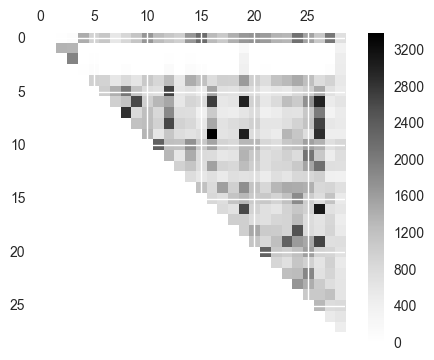

In [21]:
# take data matrix from dataframe
transaction_matrix = df.as_matrix()
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((len(df.columns),len(df.columns)))
# compare every product with every other
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches

def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, interpolation='nearest')
    fig.colorbar(cax)        
        
#print frequent_items_matrix
plot_matrix(frequent_items_matrix)

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import OrderedDict
from fractions import Fraction
%matplotlib inline

In [14]:
from collections import OrderedDict
from fractions import Fraction

In [13]:
# and finally combine product names with data
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = df.columns.values, index = df.columns.values)
 
import seaborn as sns
sns.heatmap(frequent_items_df)

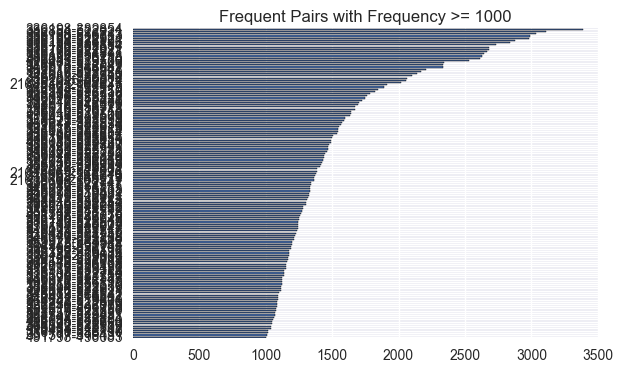

In [22]:
product_names = df.columns.values
# extract product pairs with minimum frequency(treshold) basket occurrences
def extract_pairs(treshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
        first_product = product_names[row]
        second_product = product_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_product+"-"+second_product] = matches
 
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
 
# plot pairs with minimum frequency of 1 basket matches
min_frequency = 1000
ax = pd.Series(extract_pairs(min_frequency)).plot(kind="barh", title="Frequent Pairs with Frequency >= " + str(min_frequency))